### Data Preparation 
- Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Generating the DataSets
- Importing the data from the csv files 

In [8]:
dataset = pd.read_csv("Data Science/covid19_Confirmed_dataset.csv")
dataset.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Cleaning the Dataset 
- Removing columns like "Lat", "long" and "Province/State" as they are the latitude and longitude and they don't provide any value in this analysis
- Making the column named "Country/Regions" as the index

In [9]:
df = dataset.drop(["Lat", "Long","Province/State"], axis=1, inplace=True)
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Visualizing Few countries for Check
- I have visualized the data set of India, Pakistan, Bangladesh

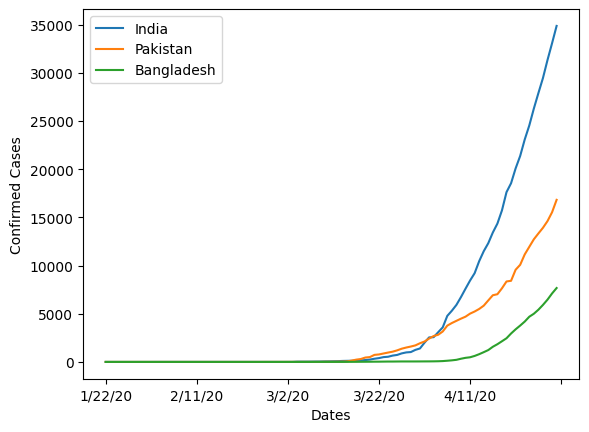

In [10]:
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Pakistan"].plot()
corona_dataset_aggregated.loc["Bangladesh"].plot()
plt.xlabel("Dates")
plt.ylabel("Confirmed Cases")
plt.legend()

### Calculating the Deriviative of the Curve
- In this case we are using the country India as an example

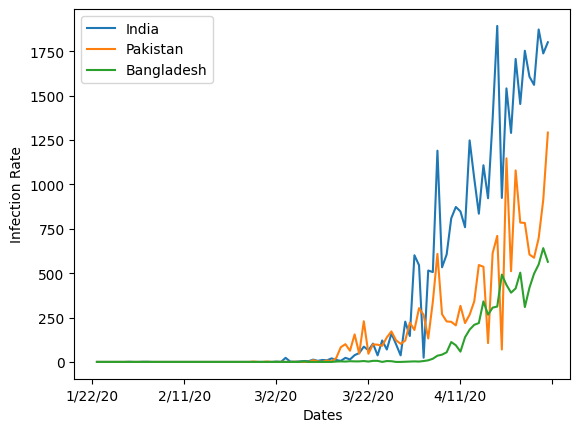

In [17]:
corona_dataset_aggregated.loc["India"].diff().plot()
corona_dataset_aggregated.loc["Pakistan"].diff().plot()
corona_dataset_aggregated.loc["Bangladesh"].diff().plot()
plt.xlabel("Dates")
plt.ylabel("Infection Rate")
plt.legend()

### Calculating the Maximum infection rate for a particular country
- Here also we will be using the country "India" as an example

In [25]:
print("The highest infection rate for India is :",corona_dataset_aggregated.loc["India"].diff().max())
print("The highest infection rate for Pakistan is :",corona_dataset_aggregated.loc["Pakistan"].diff().max())
print("The highest infection rate for Bangladesh is :",corona_dataset_aggregated.loc["Bangladesh"].diff().max())


The highest infection rate for India is : 1893.0
The highest infection rate for Pakistan is : 1292.0
The highest infection rate for Bangladesh is : 641.0


### Creating a new dataset for storing the maximum infection rate for each country 

In [29]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


### Importing the second dataset named "Happiness Report "


In [41]:
happiness_report = pd.read_csv("Data Science/worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Cleaning the Dataset

In [42]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happiness_report.drop(useless_cols, axis=1, inplace=True)
happiness_report.set_index("Country or region", inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining the Datasets 

In [44]:
#Before joining the Dataset we will see first check the shape of the data set 

print("Rows and columns of corona dataset:",corona_data.shape)
print("Rows and columns of happiness dataset:",happiness_report.shape)

Rows and columns of corona dataset: (187, 1)
Rows and columns of happiness dataset: (156, 4)


In [45]:
data = corona_data.join(happiness_report, how="inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


### Finding the correlaton using the Karl Pearson Method

In [46]:
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### For Better Visualization we will plotting the data in a graph

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

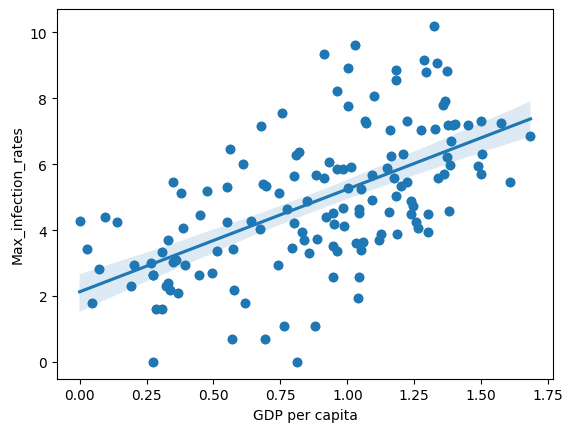

In [59]:
x = data["GDP per capita"]
y = data["Max_infection_rates"]
plt.scatter(x, np.log(y))
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

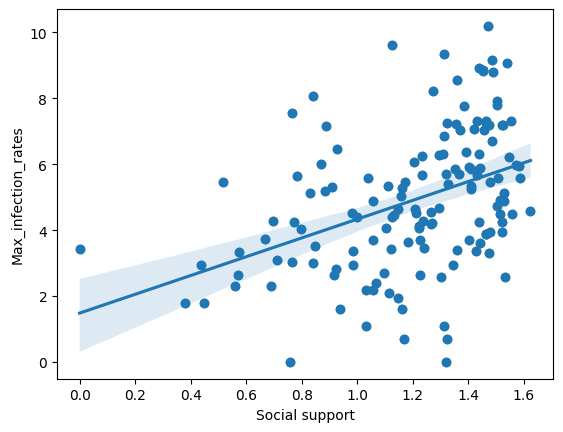

In [61]:
x = data["Social support"]
y = data["Max_infection_rates"]
plt.scatter(x, np.log(y))
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

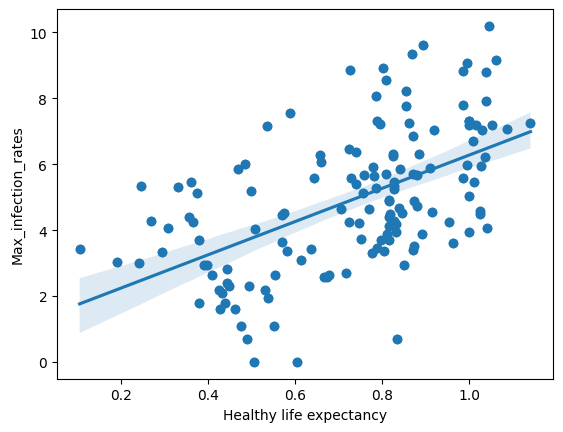

In [62]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]
plt.scatter(x, np.log(y))
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

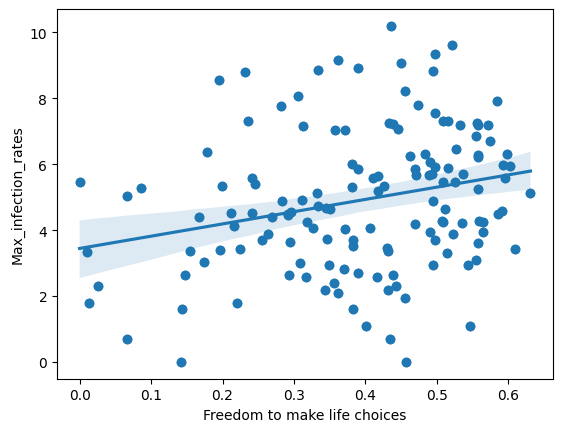

In [63]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]
plt.scatter(x, np.log(y))
sns.regplot(x=x, y=np.log(y))